# Testing neural networks to solve a binary classification problem

In [25]:
import torch
import torch.nn as nn
import numpy as np
from torch.autograd import Variable
import torch.nn.functional as F
import matplotlib.pyplot as plt

# setting different value of normal distribution creat different data

# setting sigma is 10 and 5

In [23]:
n_data = torch.ones(100,2)
x0 = torch.normal(2*n_data,10)
y0 = torch.zeros(100)
# print(x0)
x1 = torch.normal(-2*n_data,5)
y1 = torch.ones(100)

In [20]:
(2*n_data).shape

torch.Size([100, 2])

In [12]:
x0

tensor([[ 2.3343e-01,  2.5336e+01],
        [ 5.7493e+00,  1.4073e+01],
        [-5.9070e+00,  5.6416e+00],
        [-8.9291e+00,  1.1584e+01],
        [ 9.7160e+00,  2.3274e+00],
        [-3.6239e-01,  6.3974e+00],
        [-1.0322e+01,  1.1137e+01],
        [-6.7592e+00,  8.1452e+00],
        [-1.0846e+01,  1.1737e+01],
        [ 6.3250e+00,  5.1688e+00],
        [ 2.7959e+00,  6.5902e+00],
        [-1.0736e+01,  1.6223e+01],
        [-2.7364e+00, -1.4558e+01],
        [ 1.5735e+01,  1.4869e+01],
        [-6.1990e+00,  8.3207e+00],
        [ 6.4313e+00,  9.8482e+00],
        [ 1.0507e+01,  1.5889e+00],
        [-4.3106e+00,  6.4756e-01],
        [-1.0301e+01, -1.2147e+01],
        [ 9.3883e+00, -6.3734e-01],
        [ 1.3657e+01, -3.7163e+00],
        [-7.1370e+00,  3.0441e+00],
        [ 1.0868e+01, -1.4326e+01],
        [ 1.6533e+01,  9.4063e+00],
        [-2.7651e-01,  9.9905e+00],
        [ 4.9090e+00,  1.5463e+01],
        [-7.9177e+00,  8.8239e+00],
        [ 1.0789e+01, -2.130

# using pytroch 

Sequential(
  (0): Linear(in_features=2, out_features=20, bias=True)
  (1): Tanh()
  (2): Linear(in_features=20, out_features=20, bias=True)
  (3): Tanh()
  (4): Linear(in_features=20, out_features=2, bias=True)
)


/Users/soliva/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:49: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


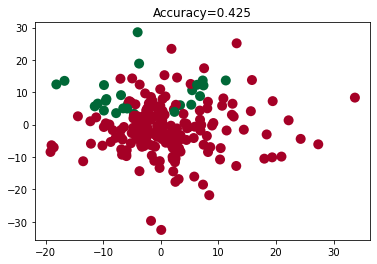

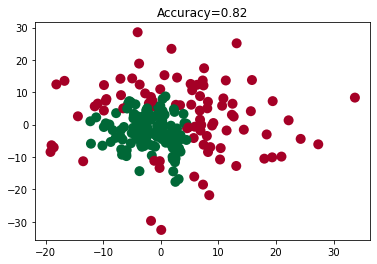

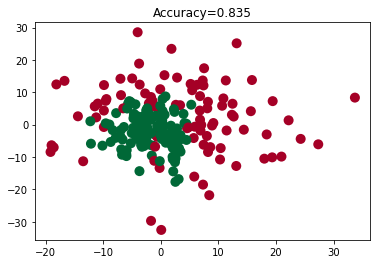

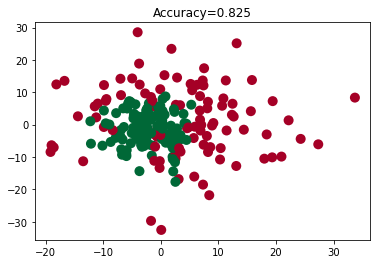

In [27]:
x = torch.cat((x0,x1),0).type(torch.FloatTensor)
y = torch.cat((y0,y1)).type(torch.LongTensor)
x,y = Variable(x),Variable(y)


# class Net(torch.nn.Module):
#     def __init__(self,n_input,n_hidden,n_output):
#         super(Net,self).__init__()
#         self.hidden1 = torch.nn.Linear(n_input,n_hidden)
#         self.hidden2 = torch.nn.Linear(n_hidden,n_hidden)
#         self.predict = torch.nn.Linear(n_hidden,n_output)

#     def forward(self, input):
#         out = self.hidden1(input)
#         out = F.sigmoid(out)
#         out = self.hidden2(out)
#         out = F.sigmoid(out)
#         out = self.predict(out)
#         # out = F.softmax(out)
#         return out
net=torch.nn.Sequential(
    nn.Linear(2,20),
    nn.Tanh(),
    nn.Linear(20,20),
    nn.Tanh(),
    nn.Linear(20,2),
)
# net = Net(2,20,2)
print(net)

optimizer = torch.optim.SGD(net.parameters(),lr=0.02)
loss_func = torch.nn.CrossEntropyLoss()

plt.ion()
plt.show()

for t in range(10000):
    out = net(x)
    # print(prediction)
    loss = loss_func(out,y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if t%3000==0:
        plt.cla()
        prediction = torch.max(F.softmax(out),1)[1]
        pred_y = prediction.data.numpy().squeeze()
        target_y = y.data.numpy()
        plt.scatter(x.data.numpy()[:, 0], x.data.numpy()[:, 1], c=pred_y, s=100, lw=0, cmap='RdYlGn')
        accuracy = sum(pred_y == target_y) / 200.  
        plt.title( 'The Accuracy is {}'.format(accuracy)  )
        plt.pause(0.1)

plt.ioff()  
plt.show()

# setting value is 1 and 30

In [23]:
n_data = torch.ones(100,2)
x0 = torch.normal(2*n_data,1)
y0 = torch.zeros(100)
# print(x0)
x1 = torch.normal(-2*n_data,30)
y1 = torch.ones(100)

Net(
  (hidden1): Linear(in_features=2, out_features=20, bias=True)
  (hidden2): Linear(in_features=20, out_features=20, bias=True)
  (predict): Linear(in_features=20, out_features=2, bias=True)
)


/Users/soliva/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:44: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


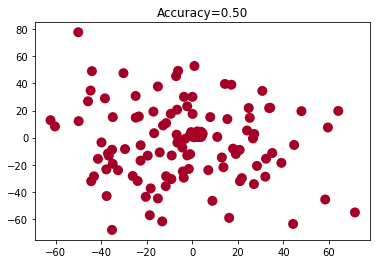

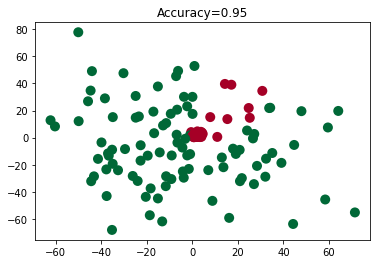

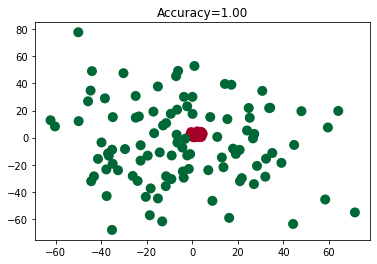

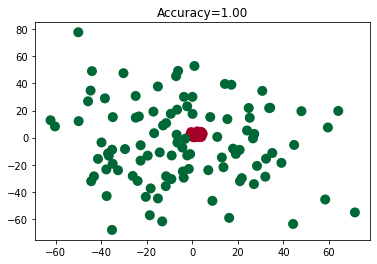

In [24]:
x = torch.cat((x0,x1),0).type(torch.FloatTensor)
y = torch.cat((y0,y1)).type(torch.LongTensor)
# print(y)
x,y = Variable(x),Variable(y)


class Net(torch.nn.Module):
    def __init__(self,n_input,n_hidden,n_output):
        super(Net,self).__init__()
        self.hidden1 = torch.nn.Linear(n_input,n_hidden)
        self.hidden2 = torch.nn.Linear(n_hidden,n_hidden)
        self.predict = torch.nn.Linear(n_hidden,n_output)

    def forward(self, input):
        out = self.hidden1(input)
        out = F.sigmoid(out)
        out = self.hidden2(out)
        out = F.sigmoid(out)
        out = self.predict(out)
        # out = F.softmax(out)
        return out

net = Net(2,20,2)
print(net)

optimizer = torch.optim.SGD(net.parameters(),lr=0.02)
loss_func = torch.nn.CrossEntropyLoss()

plt.ion()
plt.show()

for t in range(10000):
    out = net(x)
    # print(prediction)
    loss = loss_func(out,y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if t%3000==0:
        plt.cla()
        
        prediction = torch.max(F.softmax(out),1)[1]
        pred_y = prediction.data.numpy().squeeze()
        target_y = y.data.numpy()
        plt.scatter(x.data.numpy()[:, 0], x.data.numpy()[:, 1], c=pred_y, s=100, lw=0, cmap='RdYlGn')
        accuracy = sum(pred_y == target_y) / 200.  
        plt.title( 'Accuracy=%.2f' % accuracy )
        plt.pause(0.1)

plt.ioff()  
plt.show()